In [34]:
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim.lr_scheduler import StepLR
import math
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Normalize, Compose

In [35]:
# Hyper-parameter
epochs = 20
batch_size = 256

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [37]:
transform = Compose([ToTensor(), Normalize(0, 1)])

In [38]:
train_data = MNIST('data', train=True, transform=transform, download=True)
test_data = MNIST('data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=batch_size, pin_memory=True, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, pin_memory=True, shuffle=False)

In [39]:
class Module(nn.Module):
    def __init__(self):
        super(Module, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 6, (5, 5), padding=2),
            nn.ReLU(),
            nn.AvgPool2d(2, 2),
            nn.Conv2d(6, 16, (5, 5)),
            nn.ReLU(),
            nn.AvgPool2d(2, 2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(10)
        )
    def forward(self, X):
        return self.net(X)

In [ ]:
model = Module(); model.to(device)
optimizer = Adam(model.parameters(), 0.0001)
loss = CrossEntropyLoss()
# scheduler = StepLR(optimizer, 10, math.exp(-0.1))

In [41]:
history = {
    'acc':[],
    'loss':[],
    'val_acc':[],
    'val_loss':[]
}

In [ ]:
for i in range(epochs):
    print('\033[33m' + f'Epoch {i + 1} Start' + '\33[0m')
    
    # Start Training
    train_acc = 0
    train_loss = 0
    
    model.train()
    for data in train_loader:
        img, label = data
        img, label = img.to(device), label.to(device)
        
        output = model(img)
        output_loss = loss(output, label)
        # Calculate
        train_acc += (output.argmax(dim=1) == label).sum().item()
        train_loss += output_loss.item()
        # BP
        output_loss.backward()
        optimizer.step()
    # scheduler.step()
    train_acc = train_acc / len(train_data)
    train_loss /= len(train_loader)
    
    # Start Valuation
    test_acc = 0
    test_loss = 0
    
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            img, label = data
            img, label = img.to(device), label.to(device)
            
            output = model(img)
            output_loss = loss(output, label)
            # Calculate
            test_acc += (output.argmax(dim=1) == label).sum().item()
            test_loss += output_loss.item()
    test_acc = test_acc / len(test_data)
    test_loss /= len(test_loader)
    
    history['acc'].append(train_acc)
    history['loss'].append(train_loss)
    history['val_acc'].append(test_acc)
    history['val_loss'].append(test_loss)
    
    print(f'Train acc: {train_acc:.4f}, loss: {train_loss:.4f}')
    print(f'Test acc: {test_acc:.4f}, loss: {test_loss:.4f}')
    print('======================================')

Epoch 1 Start
Train acc: 0.4237, loss: 1.7755
Test acc: 0.4486, loss: 1.5266
Epoch 2 Start
Train acc: 0.5378, loss: 1.3458
Test acc: 0.6534, loss: 1.1552
Epoch 3 Start
Train acc: 0.6321, loss: 1.3063
Test acc: 0.7340, loss: 0.9490
Epoch 4 Start
Train acc: 0.7099, loss: 1.0100
Test acc: 0.7025, loss: 0.9936
Epoch 5 Start
Train acc: 0.7007, loss: 0.9730
Test acc: 0.7732, loss: 0.9322
Epoch 6 Start
Train acc: 0.7466, loss: 0.9063
Test acc: 0.7222, loss: 0.8914
Epoch 7 Start
Train acc: 0.7419, loss: 0.9372
Test acc: 0.7534, loss: 0.9206
Epoch 8 Start
Train acc: 0.7313, loss: 0.9270
Test acc: 0.7264, loss: 0.8555
Epoch 9 Start
Train acc: 0.7329, loss: 0.9243
Test acc: 0.7438, loss: 0.8635
Epoch 10 Start
Train acc: 0.7459, loss: 0.9216
Test acc: 0.7752, loss: 1.0349
Epoch 11 Start
Train acc: 0.7367, loss: 1.0239
Test acc: 0.7691, loss: 1.2256
Epoch 12 Start
Train acc: 0.7016, loss: 1.1269
Test acc: 0.7407, loss: 0.9411
Epoch 13 Start
Train acc: 0.7268, loss: 1.0733
Test acc: 0.7130, loss: 0.

In [43]:
def show(history:dict, name):
    plt.cla(); plt.clf()
    plt.plot(history[name], 'b', label='train')
    plt.plot(history['val_'+name], 'r', label='val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()
    plt.title('Performance')
    plt.show()

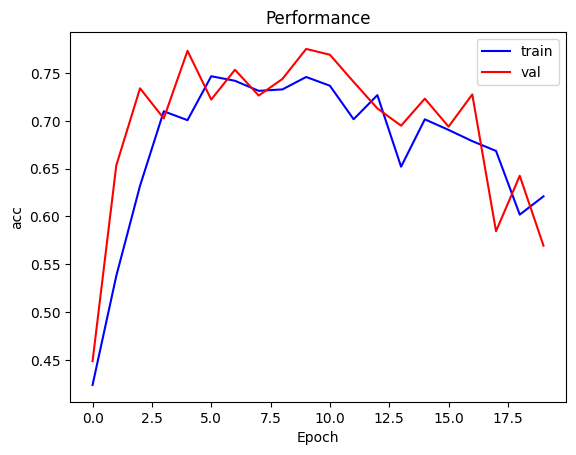

In [44]:
show(history, 'acc')

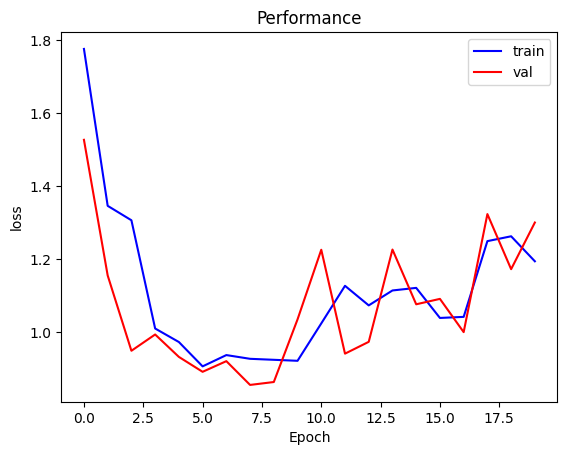

In [45]:
show(history, 'loss')